In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.transform import resize
from sklearn.utils import shuffle
from glob import glob
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential,layers,activations
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
Aphids=glob('Aphids/*jpg')[0:200]
Army_worm=glob('Army worm/*jpg')[0:200]
Bacterial_Blight=glob('Bacterial Blight/*jpg')[0:200]
Healthy=glob('Healthy/*jpg')[0:200]
Powdery_Mildew=glob('Powdery Mildew/*jpg')[0:200]
Target_spot=glob('Target spot/*jpg')[0:200]

In [3]:
classes={0:'Aphids',1:'Army Worm',2:'Bacterial Blight',3:'Healthy',4:'Powdery Mildew',5:'Target spot'}

In [4]:
images=[]
labels=[]

for i in Aphids:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)

for i in Army_worm:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)
    
for i in Bacterial_Blight:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)
    
for i in Healthy:
    img=plt.imread(i)
    images.append(img)
    labels.append(3)
    
for i in Powdery_Mildew:
    img=plt.imread(i)
    images.append(img)
    labels.append(4)
    
for i in Target_spot:
    img=plt.imread(i)
    images.append(img)
    labels.append(5)

In [5]:
images,labels=shuffle(images,labels)

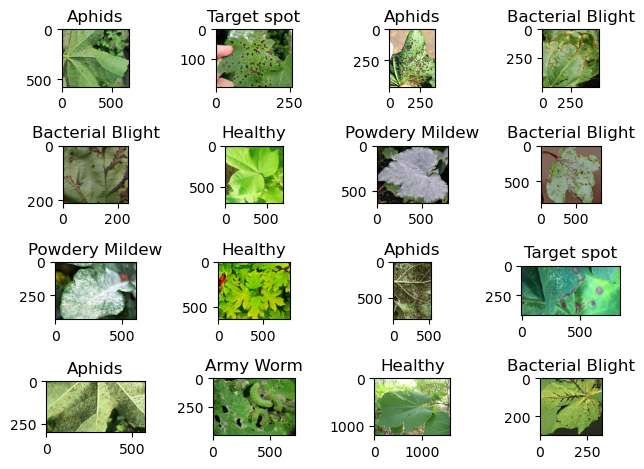

In [6]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()

In [7]:
x=[]

for i in images:
    x.append(resize(i,(224,224,3)))

In [8]:
x=np.array(x)
y=np.array(labels)

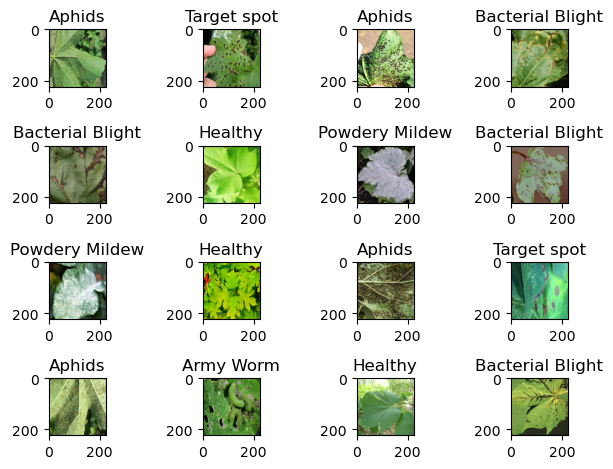

In [9]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x[i])
    plt.title(classes[y[i]])
plt.tight_layout()

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [10]:
pre_trained_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [11]:
hub.load(pre_trained_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x1d47de26d30>

In [13]:
model=Sequential([
    hub.KerasLayer(pre_trained_model, input_shape = (224,224,3), trainable = False),
    
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.1),
    
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14, activation = 'relu'),
    
    layers.Dense(6,activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 14)                910       
                                                                 
 dense_3 (Dense)             (None, 6)                 9

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(x_train,y_train,epochs=4,validation_split=0.05)

Epoch 1/4
27/27 [==============================] - 89s 2s/step - loss: 1.3716 - accuracy: 0.4632 - val_loss: 0.6933 - val_accuracy: 0.7333
Epoch 2/4
27/27 [==============================] - 38s 1s/step - loss: 0.6043 - accuracy: 0.7918 - val_loss: 0.3552 - val_accuracy: 0.8667
Epoch 3/4
27/27 [==============================] - 33s 1s/step - loss: 0.2999 - accuracy: 0.9088 - val_loss: 0.1700 - val_accuracy: 0.9333
Epoch 4/4
27/27 [==============================] - 37s 1s/step - loss: 0.1665 - accuracy: 0.9497 - val_loss: 0.1307 - val_accuracy: 0.9333


In [18]:
y_pred=model.predict(x_test)

10/10 [==============================] - 13s 1s/step


In [19]:
predicted=[np.argmax(i) for i in y_pred]

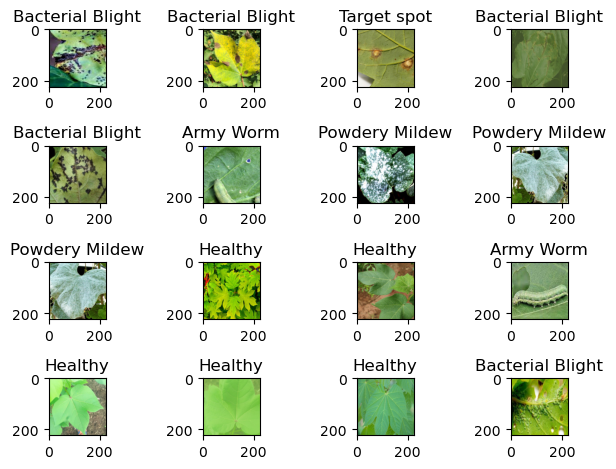

In [20]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i])
    plt.title(classes[predicted[i]])
plt.tight_layout()

In [22]:
accuracy_score(y_test,predicted)

0.9633333333333334

<AxesSubplot:>

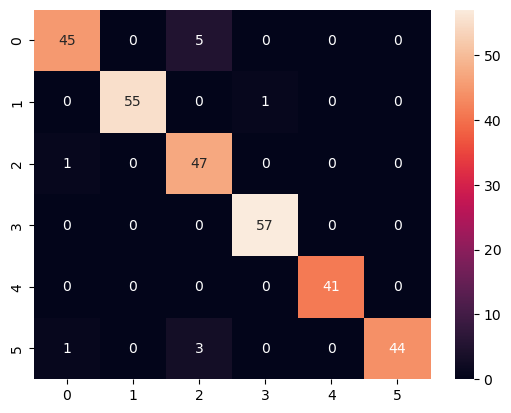

In [23]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt='d')

In [24]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       1.00      0.98      0.99        56
           2       0.85      0.98      0.91        48
           3       0.98      1.00      0.99        57
           4       1.00      1.00      1.00        41
           5       1.00      0.92      0.96        48

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.97      0.96      0.96       300

